<a href="https://colab.research.google.com/github/ribeirolucas962/modelo_de_predicao/blob/main/modelo_previs_o_venda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Relatório de Modelagem de Predição de Preços

#Índice
1.Introdução ao Modelo de Predição de Preços

2.Verificação de Dados Nulos e Descrição das Variáveis

3.Análise Exploratória de Dados

4.Preparação de Dados para Modelagem

5.Construção e Avaliação do Modelo

6.Visualizações do resultado e Conclusões do modelo.

# 1.Introdução ao Modelo de Predição de Preços

Este relatório detalha o processo de desenvolvimento de um modelo de machine learning para prever os preços com base em um conjunto de dados de vendas. O objetivo é utilizar técnicas de regressão para estimar os preços de forma a auxiliar decisões estratégicas de vendas e marketing.


#2. Importação das bibliotecas, Verificação e leitura de Dados, Nulos, Descrição das Variáveis e limpeza de dados.

##Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_log_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go
import numbergen as np
import plotly.graph_objects as go


### Primeiramente, vamos carregar os dados do arquivo Excel para ver como eles estão organizados.

In [ ]:
# Carregar os dados do arquivo Excel
file_path ='/content/base de dados de vendas.xlsx'
df=pd.read_excel(file_path)

In [ ]:
#Lendo as variaveis
df.head()

,id_cliente,nome_cliente,id_produto,nome_produto,valor_produto,quantidade_venda,quantidade_entrega,custo_entrega,valor_total_compra
0,1,João da Silva,101,Cadeira de Escritório,150,2,2,10,320
1,2,Maria Oliveira,102,Mesa de Jantar,300,1,1,20,320
2,3,Carlos Ferreira,103,Sofá de Couro,500,1,1,30,530
3,4,Ana Souza,104,Guarda-Roupa,400,2,1,25,850
4,5,Luiz Santos,105,Cama Box,600,1,1,15,615


###Lendo as quantidade de linhas e colunas.

In [ ]:
df.shape

(100, 9)

###Verificando números de nulos e descrição das variáveis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_cliente          100 non-null    int64 
 1   nome_cliente        100 non-null    object
 2   id_produto          100 non-null    int64 
 3   nome_produto        100 non-null    object
 4   valor_produto       100 non-null    int64 
 5   quantidade_venda    100 non-null    int64 
 6   quantidade_entrega  100 non-null    int64 
 7   custo_entrega       100 non-null    int64 
 8   valor_total_compra  100 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 7.2+ KB


###Estatísticas Descritivas
De forma resumida, os valores parecem razoáveis, mas há grande variação em algumas colunas como valor_produto e valor_total_compra, indicando uma possível necessidade de normalização para a modelagem.

In [ ]:
df.describe()

,id_cliente,id_produto,valor_produto,quantidade_venda,quantidade_entrega,custo_entrega,valor_total_compra
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,150.500000,140.300000,1.130000,1.120000,8.360000,170.410000
std,29.011492,29.011492,309.396464,0.337998,0.326599,9.876531,361.107083
min,1.000000,101.000000,10.000000,1.000000,1.000000,2.000000,12.000000
25%,25.750000,125.750000,30.000000,1.000000,1.000000,5.000000,35.000000
50%,50.500000,150.500000,50.000000,1.000000,1.000000,5.000000,55.000000
75%,75.250000,175.250000,80.000000,1.000000,1.000000,5.000000,90.000000
max,100.000000,200.000000,2000.000000,2.000000,2.000000,60.000000,2060.000000


###Limpeza de Dados Tratamento duplicatas ou valores inconsistentes.

In [ ]:
#Checando duplicatas
dados_duplicados = df.duplicated().sum()
dados_duplicados

0

In [ ]:
#Checando valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

id_cliente            0
nome_cliente          0
id_produto            0
nome_produto          0
valor_produto         0
quantidade_venda      0
quantidade_entrega    0
custo_entrega         0
valor_total_compra    0
dtype: int64

#3.Análise Exploratória de Dados

##Gerando um boxplot para visualizar a distribuição dos valores de algumas colunas-chave.

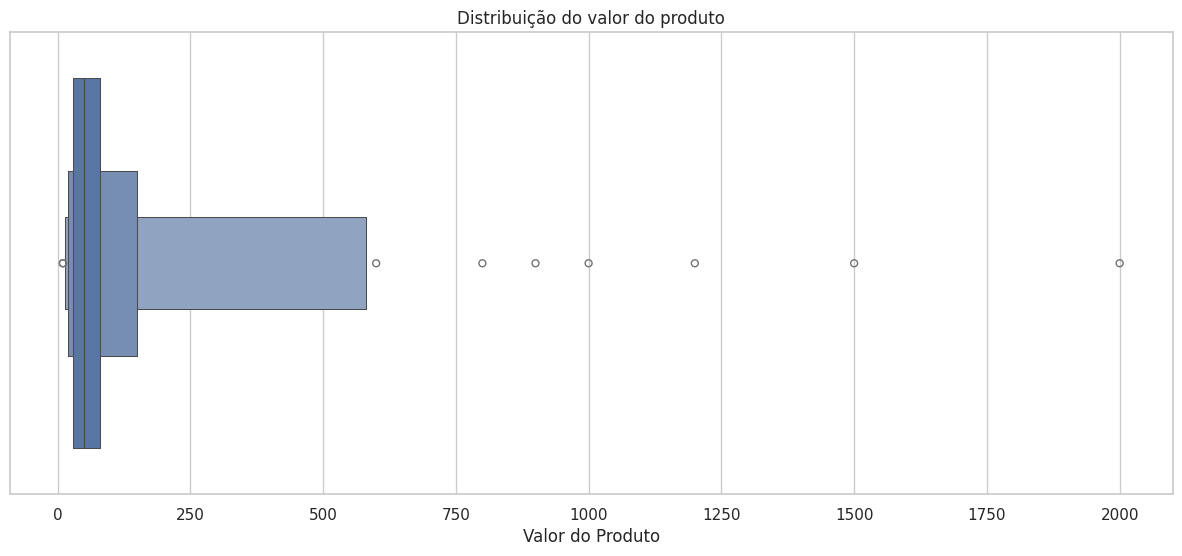

In [ ]:
#Configurando o estilo do gráfico
sns.set(style="whitegrid")
#Criar o boxplot para coluna valor_produto
plt.figure(figsize=(15,6))
sns.boxenplot(x=df['valor_produto'])
plt.title('Distribuição do valor do produto')
plt.xlabel("Valor do Produto")
plt.show()

### Filtrando de dataset para verificar se os outliers onde valor_total_compra é superior a 600, e depois exibe esses registos filtrados se faz sentido mantelos.

In [ ]:
outliers = df[df['valor_total_compra'] > 600]
print(outliers)

    id_cliente     nome_cliente  id_produto      nome_produto  valor_produto  \
3            4        Ana Souza         104      Guarda-Roupa            400   
4            5      Luiz Santos         105          Cama Box            600   
5            6  Juliana Pereira         106     Televisão 50"           1000   
6            7      André Costa         107  Geladeira Duplex           1200   
7            8      Silvia Lima         108     Fogão 4 Bocas            800   
8            9    Rafael Vieira         109  Máquina de Lavar            900   
9           10   Lucas Oliveira         110          Notebook           2000   
10          11  Fernanda Santos         111        Smartphone           1500   

    quantidade_venda  quantidade_entrega  custo_entrega  valor_total_compra  
3                  2                   1             25                 850  
4                  1                   1             15                 615  
5                  1                   1     

##Correlação entre Variáveis
###Antes de proceder com a modelagem, é útil verificar a correlação entre as variáveis para entender quais são relevantes para incluir no modelo de predição.Vou calcular e visualizar a matriz de correlação. ​

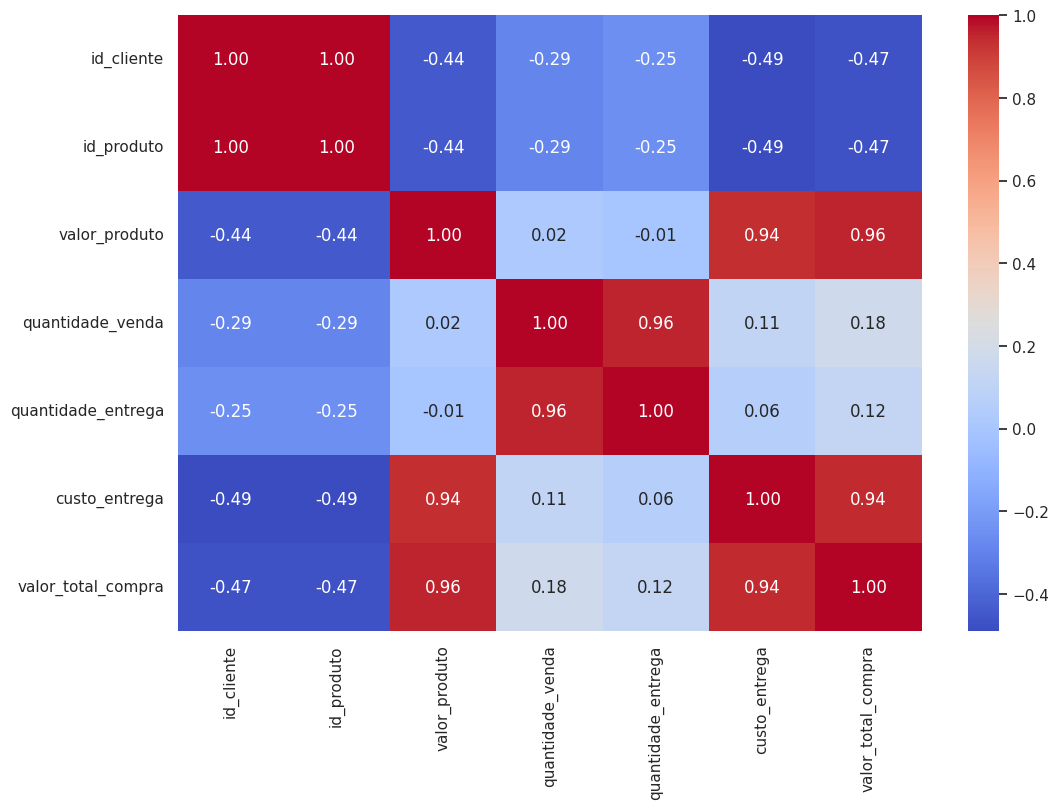

In [ ]:
#Calcular a matriz de correlação
numeric_cols = df.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()
#Visualisando as matriz de correlação com heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

##Análise da Matriz de Correlação
A matriz de correlação revela várias correlações interessantes:

valor_produto e valor_total_compra: Alta correlação positiva, o que é esperado já que o valor total da compra deveria aumentar com o valor do produto.
quantidade_venda e quantidade_entrega: Correlação moderadamente alta, indicando que normalmente a quantidade entregue acompanha a quantidade vendida.
Correlações menores entre os custos de entrega e outras variáveis, o que sugere que o custo de entrega não é fortemente influenciado pelos valores ou quantidades de produtos.


#Preparação dos Dados para Modelagem
###Com base nesta análise inicial, as variáveis mais promissoras para incluir no modelo de predição do valor_total_compra seriam valor_produto, quantidade_venda, e custo_entrega. Agora, vou preparar os dados para modelagem, incluindo a separação em conjuntos de treino e teste.


In [ ]:
#Selecionando variáveis preditoras e variável alvo
x= df[['valor_produto', 'quantidade_venda', 'custo_entrega']]
y=df['valor_total_compra']

In [ ]:
#Dividindo os dados em conjuntos de treino teste
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.2, random_state=42)


#5.Construção e Avaliação do Modelo Modelagem
##Para a predição, vou utilizar uma regressão linear, que é um modelo simples e eficaz para entender as relações lineares entre as variáveis.

In [ ]:
#Criando e treinando o modelo de regressão linear
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Fazendo previsão como o conjunto de teste
y_pred=model.predict(x_test)

#6.Visualizações do resultado e Conclusões do modelo.
##O modelo de regressão linear obteve os seguintes resultados nas métricas de desempenho.

###Erro Quadrático Médio (MSE) 3436.42. Este valor indica o erro médio quadrático das previsões do modelo em relação aos valores reais.Coeficiente de Determinação (R²) 0.97. Este valor mostra que o modelo é capaz de explicar 97% da variância nos dados de teste, o que é um resultado excelente para um modelo preditivo.

In [ ]:
#Calculando metricas de desempenho do modelo.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

MSE: 3436.4154071700877
R^2: 0.9700336027621032


##Visualização Interativa
###Para explorar melhor os resultados, vou criar um gráfico interativo que permite visualizar as previsões do modelo em comparação com os valores reais. Isso ajudará a entender como o modelo está performando em diferentes segmentos do conjunto de teste.

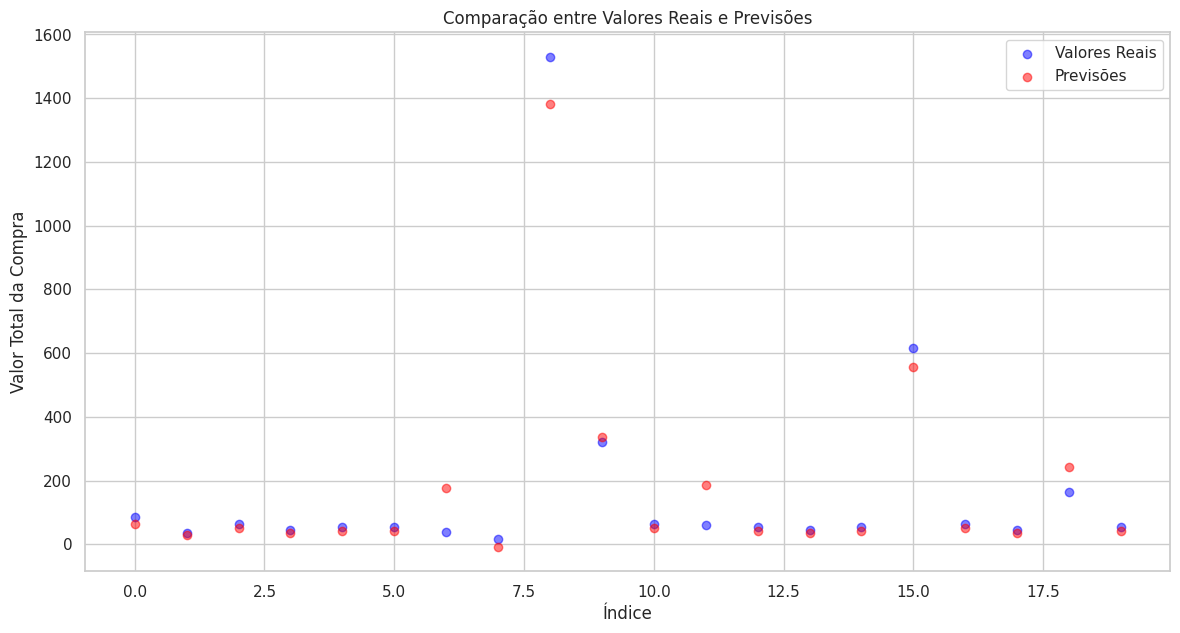

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valores Reais', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Previsões', alpha=0.5)
plt.title('Comparação entre Valores Reais e Previsões')
plt.xlabel('Índice')
plt.ylabel('Valor Total da Compra')
plt.legend()
plt.show()

#Conclusão
Este relatório demonstra o potencial da análise de dados e modelagem preditiva para transformar insights de dados em ações estratégicas concretas. Com a continuação do refinamento e expansão deste trabalho, a empresa pode esperar melhorias significativas na eficiência operacional e no sucesso de vendas.